In [33]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/train.csv')

In [34]:
na_df = df.copy().replace(-1, np.NaN)

In [35]:
na_df.drop(columns=['id'], inplace=True)

In [36]:
na_df.dropna(inplace=True)

In [37]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
categorical_columns = [col for col in na_df.columns if 'cat' in col or 'bin' in col]
na_df[categorical_columns] = na_df[categorical_columns].astype(np.int32)

In [39]:
na_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124931 entries, 3 to 595205
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          124931 non-null  int64  
 1   ps_ind_01       124931 non-null  int64  
 2   ps_ind_02_cat   124931 non-null  int32  
 3   ps_ind_03       124931 non-null  int64  
 4   ps_ind_04_cat   124931 non-null  int32  
 5   ps_ind_05_cat   124931 non-null  int32  
 6   ps_ind_06_bin   124931 non-null  int32  
 7   ps_ind_07_bin   124931 non-null  int32  
 8   ps_ind_08_bin   124931 non-null  int32  
 9   ps_ind_09_bin   124931 non-null  int32  
 10  ps_ind_10_bin   124931 non-null  int32  
 11  ps_ind_11_bin   124931 non-null  int32  
 12  ps_ind_12_bin   124931 non-null  int32  
 13  ps_ind_13_bin   124931 non-null  int32  
 14  ps_ind_14       124931 non-null  int64  
 15  ps_ind_15       124931 non-null  int64  
 16  ps_ind_16_bin   124931 non-null  int32  
 17  ps_ind_17_bin  

In [40]:
categorical_columns = [col for col in na_df.columns if 'cat' in col or 'bin' in col]
one_hot_encoder = OneHotEncoder(drop='first') # OneHotEncoder 객체 생성
dummy_variables = one_hot_encoder.fit_transform(na_df[categorical_columns]) # 범주형 변수를 더미 변수로 변환
dummy_df = pd.DataFrame(dummy_variables.toarray(), columns=one_hot_encoder.get_feature_names_out(categorical_columns))

In [42]:
dummy_df.head()

,ps_ind_02_cat_2,ps_ind_02_cat_3,ps_ind_02_cat_4,ps_ind_04_cat_1,ps_ind_05_cat_1,ps_ind_05_cat_2,ps_ind_05_cat_3,ps_ind_05_cat_4,ps_ind_05_cat_5,ps_ind_05_cat_6,...,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104,ps_calc_15_bin_1,ps_calc_16_bin_1,ps_calc_17_bin_1,ps_calc_18_bin_1,ps_calc_19_bin_1,ps_calc_20_bin_1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [43]:
all_features = na_df.columns
# cat, bin 삭제
remaining_features = [feature for feature in all_features
                      if ('cat' not in feature and
                          'bin' not in feature )]
df_real_number = na_df[remaining_features].drop(columns=['target'])

In [44]:
df_real_number

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,...,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
3,0,2,0,8,0.9,0.2,0.580948,1.0,0.374166,0.542949,...,4,7,1,8,4,2,2,2,4,9
7,5,4,0,13,0.7,0.4,0.607248,3.0,0.446990,0.900574,...,2,7,1,6,1,13,7,1,3,6
9,1,2,0,4,0.9,1.4,2.316652,2.0,0.447214,1.458184,...,2,8,2,9,1,11,3,5,0,6
13,1,3,0,12,0.7,0.9,0.684197,3.0,0.400000,0.983311,...,1,10,1,8,3,8,2,0,4,3
17,5,6,0,4,0.9,0.5,0.810864,2.0,0.316228,0.876295,...,3,8,2,9,1,10,9,1,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595198,5,7,0,11,0.8,0.5,0.839643,3.0,0.374166,0.842359,...,2,9,5,8,2,10,6,2,2,14
595201,0,2,0,5,0.4,0.0,0.812404,3.0,0.316228,0.605399,...,0,9,3,9,2,11,4,1,2,6
595202,4,3,0,2,0.5,0.0,0.366572,2.0,0.447214,0.744248,...,2,7,3,8,2,7,11,6,2,6
595203,3,3,0,5,0.9,1.4,1.939233,3.0,0.400000,1.135400,...,1,7,2,10,1,11,5,2,1,6


In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_real_number)

df_scaled = pd.DataFrame(scaled, columns=df_real_number.columns)
df_scaled

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,...,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
0,0.000000,0.181818,0.0,0.615385,1.000000,0.111111,0.136274,0.333333,0.207162,0.101729,...,0.666667,0.625,0.111111,0.6,0.571429,0.08,0.111111,0.2,0.307692,0.409091
1,0.714286,0.363636,0.0,1.000000,0.777778,0.222222,0.143358,1.000000,0.271982,0.226181,...,0.333333,0.625,0.111111,0.4,0.142857,0.52,0.388889,0.1,0.230769,0.272727
2,0.142857,0.181818,0.0,0.307692,1.000000,0.777778,0.603775,0.666667,0.272181,0.420227,...,0.333333,0.750,0.222222,0.7,0.142857,0.44,0.166667,0.5,0.000000,0.272727
3,0.142857,0.272727,0.0,0.923077,0.777778,0.500000,0.164083,1.000000,0.230157,0.254973,...,0.166667,1.000,0.111111,0.6,0.428571,0.32,0.111111,0.0,0.307692,0.136364
4,0.714286,0.545455,0.0,0.307692,1.000000,0.277778,0.198200,0.666667,0.155592,0.217732,...,0.500000,0.750,0.222222,0.7,0.142857,0.40,0.500000,0.1,0.230769,0.409091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124926,0.714286,0.636364,0.0,0.846154,0.888889,0.277778,0.205952,1.000000,0.207162,0.205923,...,0.333333,0.875,0.555556,0.6,0.285714,0.40,0.333333,0.2,0.153846,0.636364
124927,0.000000,0.181818,0.0,0.384615,0.444444,0.000000,0.198615,1.000000,0.155592,0.123462,...,0.000000,0.875,0.333333,0.7,0.285714,0.44,0.222222,0.1,0.153846,0.272727
124928,0.571429,0.272727,0.0,0.153846,0.555556,0.000000,0.078533,0.666667,0.272181,0.171780,...,0.333333,0.625,0.333333,0.6,0.285714,0.28,0.611111,0.6,0.153846,0.272727
124929,0.428571,0.272727,0.0,0.384615,1.000000,0.777778,0.502120,1.000000,0.230157,0.307899,...,0.166667,0.625,0.222222,0.8,0.142857,0.44,0.277778,0.2,0.076923,0.272727


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# PCA 모델 생성
pca = PCA()
pca.fit(df_scaled)
# 누적 설명 가능한 분산의 비율 계산
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

주성분 개수	누적 설명 가능한 분산 비율
19		0.957190782924947


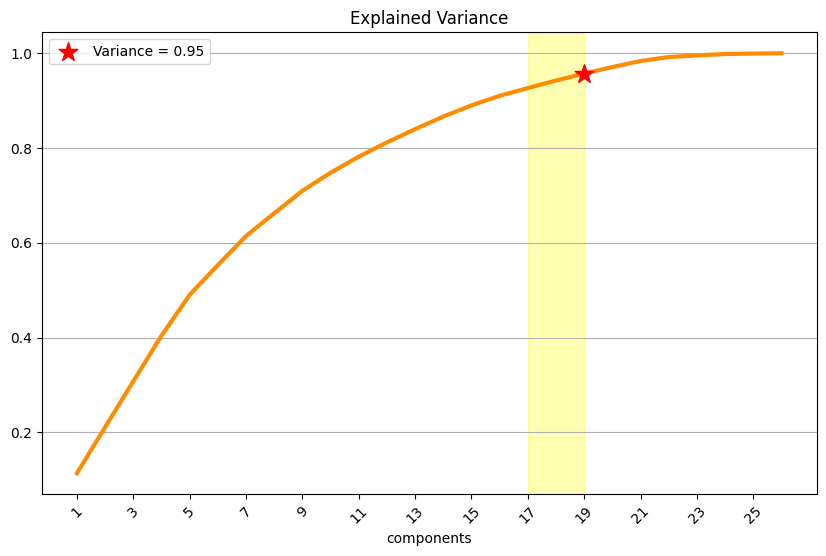

In [47]:
import seaborn as sns
# 주성분 개수별 설명 가능한 분산의 비율 출력 및 별 표시
print("주성분 개수\t누적 설명 가능한 분산 비율")
for i, explained_variance_ratio in enumerate(cumulative_variance_ratio):
    if 0.95 <= explained_variance_ratio <= 0.97:
      print(f"{i+1}\t\t{explained_variance_ratio}")

# 시각화: 주성분 개수에 따른 설명 가능한 분산 비율
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, len(cumulative_variance_ratio) + 1), y=cumulative_variance_ratio, color='darkorange',linewidth=3)
plt.title('Explained Variance')
plt.xlabel('components')
plt.xticks(range(1, len(cumulative_variance_ratio) + 1), rotation=45)
plt.locator_params(axis='x', nbins=(len(cumulative_variance_ratio)+1)/2)
plt.grid(True, axis='y')   # 세로 그리드 제거
plt.axvspan(17, 19, color='yellow', alpha=0.3)

# 설명 가능한 분산이 0.95 이상 0.97 이하인 지점에 별 표시 및 회색 음영 추가
highlighted_indexes = []
for i, explained_variance_ratio in enumerate(cumulative_variance_ratio):
    if 0.95 <= explained_variance_ratio < 0.96:
        plt.scatter(i + 1, explained_variance_ratio, marker='*', color='red',zorder=3, s=200, label='Variance = 0.95')
        highlighted_indexes.append(i + 1)
plt.legend()
plt.show()


In [48]:
pca = PCA(n_components=19)
principalComponents = pca.fit_transform(df_scaled)
column_names = [f'PC{i+1}' for i in range(principalComponents.shape[1])]
principalDf = pd.DataFrame(data=principalComponents, columns =column_names)
principalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,-0.349112,-0.152450,-0.059076,-0.635487,-0.054015,0.436237,-0.178179,-0.312650,-0.040015,-0.285685,0.362717,0.223266,0.264780,0.083908,-0.228934,0.126569,0.026584,-0.208520,0.075272
1,0.340051,-0.564279,0.040320,-0.044018,0.307076,-0.298629,0.050798,-0.267112,-0.232860,-0.163630,0.023869,-0.193599,-0.070081,0.082787,-0.212709,0.329996,0.029202,0.088065,-0.071657
2,0.089233,0.507356,0.258067,-0.287504,-0.623966,0.168189,-0.005550,-0.223637,-0.046235,0.305916,0.012014,-0.181985,-0.107129,-0.044940,-0.108554,0.027328,-0.238820,-0.062319,-0.041595
3,0.032158,0.396445,0.021849,-0.309775,-0.015263,-0.302683,-0.293517,-0.227412,-0.047207,0.092490,-0.147212,0.101429,-0.048791,-0.298068,-0.213873,0.136133,0.028194,-0.211206,-0.211715
4,0.270903,-0.465988,0.019790,-0.189271,-0.094965,0.242089,0.362131,0.042129,-0.281914,-0.180864,0.187137,-0.193933,-0.189632,-0.042031,-0.106809,0.028515,0.058459,0.190410,0.061304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124926,0.448079,-0.241316,-0.343780,-0.029747,0.245210,-0.172263,0.036755,0.066978,0.119039,-0.180966,0.022166,-0.045366,-0.060422,-0.155816,0.229965,0.113662,-0.062858,0.060065,0.296277
124927,-0.588763,0.306102,0.023086,-0.175663,0.073170,-0.216880,0.169810,0.047113,0.321567,0.038681,-0.314366,-0.046826,0.250032,-0.162264,0.002878,0.022877,-0.086086,-0.058659,-0.072927
124928,-0.236553,-0.166274,-0.429900,-0.345929,0.151255,0.186149,0.617583,-0.033462,-0.066880,-0.076962,0.023251,-0.053568,0.122613,0.087263,0.003448,0.116618,0.035249,0.323207,-0.037124
124929,0.339644,0.116005,-0.321991,-0.408682,-0.499053,-0.129082,0.117768,-0.062313,0.338801,0.208558,-0.151918,-0.183313,-0.101937,0.077521,-0.111906,-0.074165,-0.139177,0.017018,-0.068255


In [82]:
target_df = pd.DataFrame({'target':na_df['target']})
target_df.reset_index(drop=['index'], inplace=True)

In [83]:
target_df.head()

,target
0,0
1,0
2,1
3,0
4,0


In [85]:
final_df = pd.concat([dummy_df, principalDf, target_df], axis=1)
final_df

,ps_ind_02_cat_2,ps_ind_02_cat_3,ps_ind_02_cat_4,ps_ind_04_cat_1,ps_ind_05_cat_1,ps_ind_05_cat_2,ps_ind_05_cat_3,ps_ind_05_cat_4,ps_ind_05_cat_5,ps_ind_05_cat_6,...,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.362717,0.223266,0.264780,0.083908,-0.228934,0.126569,0.026584,-0.208520,0.075272,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023869,-0.193599,-0.070081,0.082787,-0.212709,0.329996,0.029202,0.088065,-0.071657,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.012014,-0.181985,-0.107129,-0.044940,-0.108554,0.027328,-0.238820,-0.062319,-0.041595,1
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.147212,0.101429,-0.048791,-0.298068,-0.213873,0.136133,0.028194,-0.211206,-0.211715,0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.187137,-0.193933,-0.189632,-0.042031,-0.106809,0.028515,0.058459,0.190410,0.061304,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124926,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022166,-0.045366,-0.060422,-0.155816,0.229965,0.113662,-0.062858,0.060065,0.296277,0
124927,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.314366,-0.046826,0.250032,-0.162264,0.002878,0.022877,-0.086086,-0.058659,-0.072927,0
124928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023251,-0.053568,0.122613,0.087263,0.003448,0.116618,0.035249,0.323207,-0.037124,0
124929,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.151918,-0.183313,-0.101937,0.077521,-0.111906,-0.074165,-0.139177,0.017018,-0.068255,0


### CSV

In [64]:
final_df.to_csv('data/final_pca_modified.csv', index=False)